In [1]:
#IMPORTUJEMY BIBLIOTEKI

#Pandas - to biblioteka oprogramowania napisana dla języka programowania Python do manipulacji i analizy danych.
#Matplotlib - Biblioteka do tworzenia wykresów dla języka programowania Python i jego rozszerzenia numerycznego NumPy.
#Openpyxl - biblioteka wspomagająca obsługę plików xlsx/xlsm/xltx/xltm i ich zapisu

import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import Workbook

In [2]:
#WCZYTANIE DANYCH I DEKLARACJA ZMIENNYCH
potwierdzone = pd.read_csv('confirmed.csv')
smierci = pd.read_csv('deaths.csv')
wyleczeni = pd.read_csv('recovered.csv')

#WYRZUCAM NAZWY WŁASNE Z DOKUMENT (PROWINCJA, WOJEWÓDZTWO ITP.)
potwierdzone = potwierdzone.drop(['Province/State', 'Lat', 'Long'], axis=1)
smierci = smierci.drop(['Province/State', 'Lat', 'Long'], axis=1)
wyleczeni = wyleczeni.drop(['Province/State', 'Lat', 'Long'], axis=1)

#GRUPUJE DANE WG. KRAJÓW
potwierdzone = potwierdzone.groupby(potwierdzone['Country/Region']).aggregate('sum')
smierci = smierci.groupby(smierci['Country/Region']).aggregate('sum')
wyleczeni = wyleczeni.groupby(wyleczeni['Country/Region']).aggregate('sum')

#TRANSPOZYCJA - ZAMIANA MIEJSC DAT Z KRAJAMI
potwierdzone = potwierdzone.T
smierci = smierci.T
wyleczeni = wyleczeni.T

# print(smierci)

In [3]:
#WYSZUKUJEMY WZROSTÓW: ZARAŻONYCH, ŚMIERCI, WYLECZONYCH
n_przypadki = potwierdzone.copy()

#Dla każdego dnia (wiersza) w pliku "potwierdzone" wyszukujemy nowych przypadków
for day in range(1, len(potwierdzone)):
    n_przypadki.iloc[day] = potwierdzone.iloc[day] - potwierdzone.iloc[day - 1]
print(n_przypadki.tail(10)) #Ostatnie 10

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  Antarctica  \
10/9/22                 170       22        6        0       0           0   
10/10/22                 97        9        6        0       0           0   
10/11/22                157       31        3        0       0           0   
10/12/22                103       21        6       91       0           0   
10/13/22                117       24        0        0       0           0   
10/14/22                168       19       12        0       0           0   
10/15/22                 82       21        0        0       0           0   
10/16/22                116       19        6        0       0           0   
10/17/22                 64        7       17        0       0           0   
10/18/22                227       28        9        0       0           0   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  ...  \
10/9/22                           0       2239        0       1039

In [4]:
#SPRAWDZAMY PROCENTOWY WZROST ZACHOROWAŃ W PORÓWNANIU DO POPRZEDNIEGO DNIA
w_wzrostu = potwierdzone.copy()
for day in range(1, len(potwierdzone)):
    w_wzrostu.iloc[day] = (w_wzrostu.iloc[day] / potwierdzone.iloc[day-1]) * 100
# print(n_przypadki.tail(10)) #Ostatnie 10

In [5]:
#SPRAWDZAMY ILOŚĆ AKTYWNIE CHORYCH
a_przypadki = potwierdzone.copy()
for day in range (0, len(potwierdzone)):
    a_przypadki.iloc[day] = potwierdzone.iloc[day] - smierci.iloc[day] - wyleczeni.iloc[day]
# print(n_przypadki.tail(10)) #Ostatnie 10

In [6]:
a_przypadki = potwierdzone.copy()
for day in range (0, len(potwierdzone)):
    a_przypadki.iloc[day] = potwierdzone.iloc[day] - smierci.iloc[day] - wyleczeni.iloc[day]
# print(n_przypadki.tail(10)) #Ostatnie 10

In [7]:
#PROCENTOWY WZROST Z DNIA NA DZIEŃ
p_wzrost = potwierdzone.copy()
for day in range(1, len(potwierdzone)):
    p_wzrost.iloc[day] = ((a_przypadki.iloc[day] - a_przypadki.iloc[day-1]) / a_przypadki.iloc[day - 1]) * 100
# print(n_przypadki.tail(10)) #Ostatnie 10

In [8]:
#PROCENTOWY WSKAŹNIK ŚMIERCI
w_smierci = potwierdzone.copy()

for day in range(0, len(potwierdzone)):
    w_smierci.iloc[day] = (smierci.iloc[day] / potwierdzone.iloc[day]) * 100
# print(n_przypadki.tail(10)) #Ostatnie 10

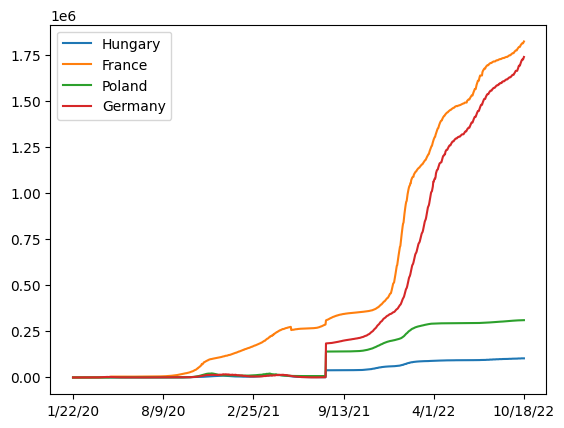

In [9]:
#PROCENT CHORYCH KTÓRZY WYMAGAJĄ HOSTPITALIZAJI
#Wg. artykułu na internecie powinno to wynosić 5%
wskaznik_hospitalozowanych = 0.05

#SPRAWDZIMY ILE W KAŻDY KONKRETNY DZIEŃ JEST WYMAGANA HOSPITALIZACJA 
wymaganie_leczonych = potwierdzone.copy()
for day in range(0, len(potwierdzone)):
    wymaganie_leczonych.iloc[day] = a_przypadki.iloc[day] * wskaznik_hospitalozowanych

kraje = ['Hungary', 'France', 'Poland', 'Germany']

for kraj in kraje:
    wymaganie_leczonych[kraj].plot(label=kraj)
plt.legend(loc = 'upper left')
plt.show()

In [10]:
#KALKULACJA ZAKAŻEŃ (i innych) I SORTOWANIE ICH WARTOŚCI OD NAJWYŻSZEJ
from tkinter import N
from numpy import sort

sort_zakazeni = n_przypadki.copy()
sort_zakazeni = pd.DataFrame.sum(sort_zakazeni)

# sort_zakazeni_d = sort_zakazeni.sort_values(ascending=False) #Sortowanie malejące
sort_zakazeni_a = sort_zakazeni.sort_values(ascending=False) #Sortowanie wzrastające

# print(sort_zakazeni_d)

print(sort_zakazeni_a)

Country/Region
US              97023298
India           44634376
France          36573007
Germany         34888963
Brazil          34746462
                  ...   
Holy See              29
Tuvalu                20
Antarctica            11
MS Zaandam             9
Korea, North           1
Length: 201, dtype: int64


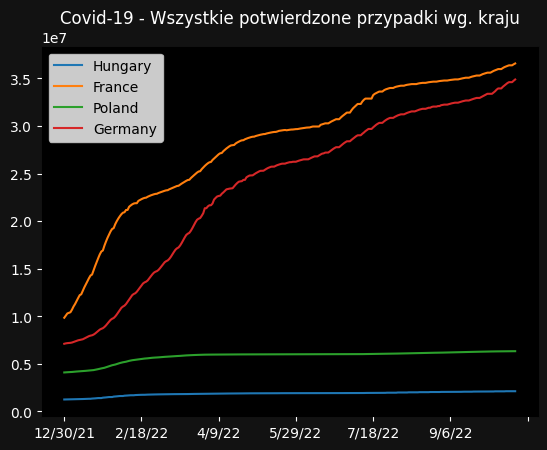

In [11]:
#WYŚWIETLAMY WYKRES PRZEDSTAWIAJĄCY CAŁKOWITĄ LICZBĘ ZAKAŻONYCH OSÓB WG. KRAJÓW
ax = plt.subplot()

#USTAWIAMY WŁAŚCIWOŚCI WYKRESU
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors = 'white')
ax.tick_params(axis='y', colors = 'white')
ax.set_title('Covid-19 - Wszystkie potwierdzone przypadki wg. kraju', color = 'white')

#JAKO PRZYKŁAD DAJE TEN ROK, ZE WZGLĘDU NA DUŻĄ ILOŚĆ DANYCH
for kraj in kraje:
    potwierdzone[kraj][708:].plot(label=kraj)

plt.legend(loc = 'upper left')
plt.show()

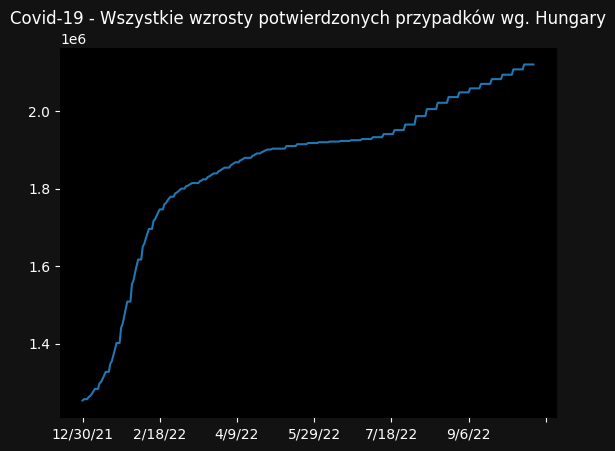

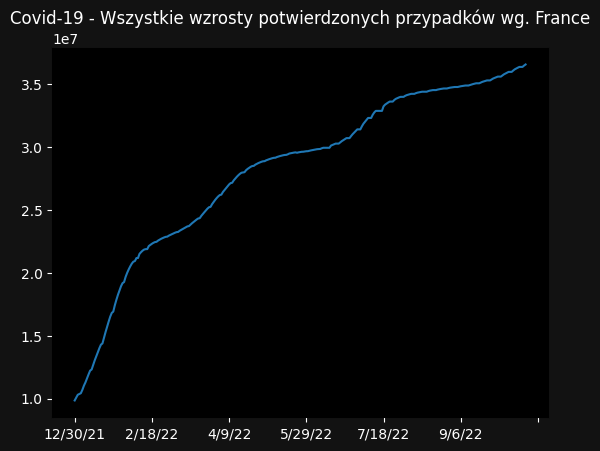

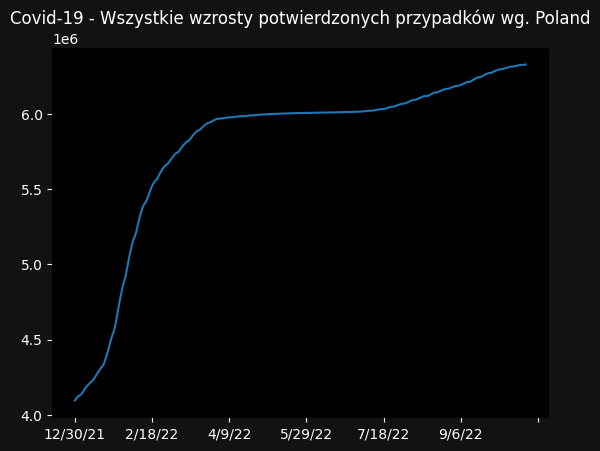

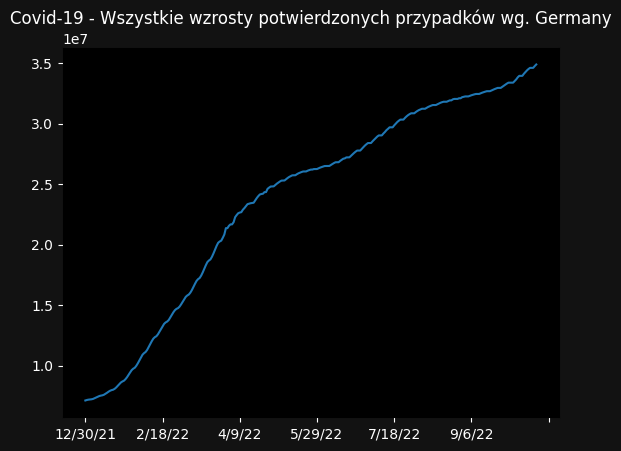

In [12]:
#TO CO WYŻEJ WYMIENIONE, TYLKO W ODDZIELNYCH WYKRESACH
for kraj in kraje: 
    ax = plt.subplot()
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#121212')
    ax.tick_params(axis='x', colors = 'white')
    ax.tick_params(axis='y', colors = 'white')
    ax.set_title(f'Covid-19 - Wszystkie wzrosty potwierdzonych przypadków wg. {kraj}', color = 'white')
    potwierdzone[kraj][708:].plot(label=kraj)
    plt.show()

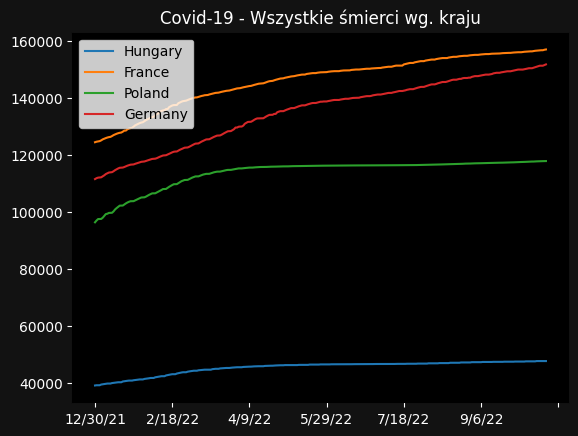

In [14]:
#LICZBA OSÓB KTÓRE ZMARŁY NA COVID-19
ax = plt.subplot()
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors = 'white')
ax.tick_params(axis='y', colors = 'white')
ax.set_title(f'Covid-19 - Wszystkie śmierci wg. kraju', color = 'white')

for kraj in kraje:
    smierci[kraj][708:].plot(label=kraj)

plt.legend(loc = 'upper left')
plt.show()

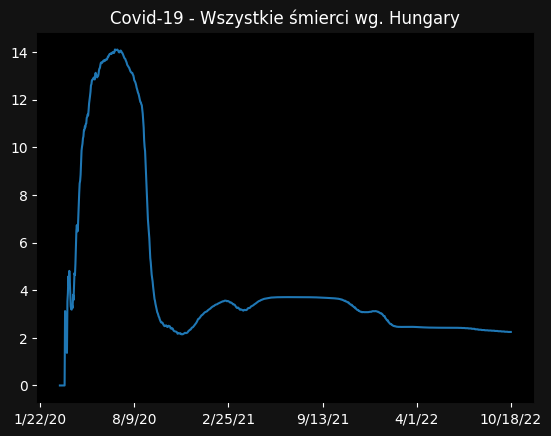

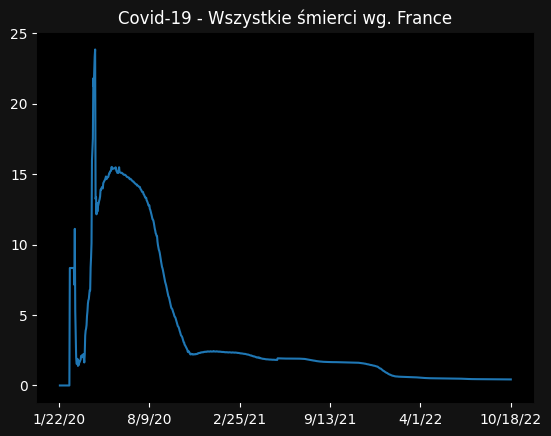

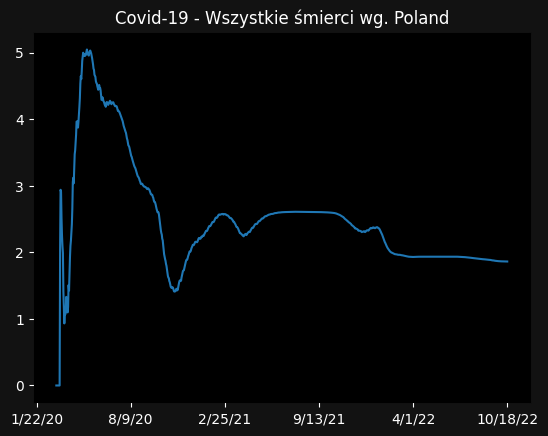

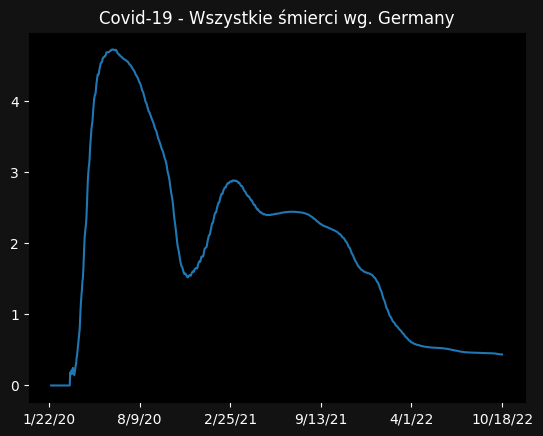

In [15]:
#PROCENT OSÓB KTÓRE ZMARŁY W STOSUNKU DO OSÓB ŻYWYCH+CHORYCH
for kraj in kraje: 
    ax = plt.subplot()
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#121212')
    ax.tick_params(axis='x', colors = 'white')
    ax.tick_params(axis='y', colors = 'white')
    ax.set_title(f'Covid-19 - Wszystkie śmierci wg. {kraj}', color = 'white')
    w_smierci[kraj].plot(label=kraj)
    plt.show()

In [ ]:
#EKSPERYMENT:
#Załóżmy że dziennie, jest 10% więcej przypadków osób chorych, w stosunku do liczby osób chorych z dnia poprzenigo

#TJ.
#Jeśli w dniu 10/15/2020 jest 320 osób
#To w dniu 11/15/2020 będzie 352 osoby. I tak dalej

symulacja_wzrostu_liczby_chorych = 0.1

dates = pd.date_range(start='10/15/2020', periods = 40, freq = "D")
dates = pd.Series(dates)
dates = dates.dt.strftime('%m/%d/%y')

simulated = potwierdzone.copy()
simulated = simulated.append(pd.DataFrame(index = dates))

for day in range(len(potwierdzone), len(potwierdzone)+40):
    simulated.iloc[day] = simulated.iloc[day-1] * (1 + symulacja_wzrostu_liczby_chorych)

ax = plt.subplot()
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors = 'white')
ax.tick_params(axis='y', colors = 'white')
ax.set_title(f'Symulacja zachorowań', color = 'white')
simulated['Poland'].plot()
plt.show()

# print(simulated)

In [106]:
#ZAPIS DO PLIKU
# data = pd.DataFrame(a_przypadki)
# data = pd.DataFrame(p_wzrost)

data = pd.DataFrame(simulated)

data.to_excel("output_symulacja.xlsx")